In [144]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import itertools
import seaborn as sns

## Set some pandas options to show the full rows and columns of a DF
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', 1000)

## Helper plotting functions
[Confusion matrix plotting code care of scikit-learn](https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py)

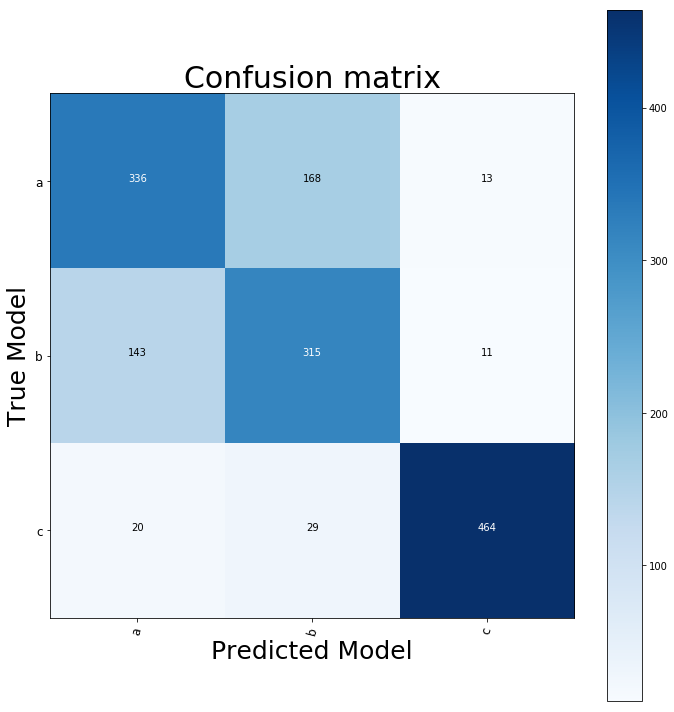

In [145]:
def plot_confusion_matrix(cm, classes, writeOut=True,
                          normalize=False,
                          title='Confusion matrix',
                          outpng="outfile",
                          cmap=plt.cm.Blues, ax=[]):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=75, fontsize=12)
    plt.yticks(tick_marks, classes, fontsize=12)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize=10,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True Model', fontsize=25)
    plt.xlabel('Predicted Model', fontsize=25)
    plt.tight_layout()
    
    if (writeOut==True):
        outFile = outpng + ".png"
        plt.savefig(outFile, bbox_inches='tight',  dpi=300)
    
cm = np.array([[336, 168, 13], [143, 315, 11], [20, 29, 464]])
plot_confusion_matrix(cm, ["a", "b", "c"], writeOut=False)

In [79]:
## Full list of model names
modelNames = list(["Panmixia", "Ancient Vicariance", 
                 "AV + scdnry cntct", "AV + mig",
                 "AV + cntrct/expand", "AV + mig + cntrct/expand",
                 "AV + sc + cntrct/expand", "Recent Dispersal", 
                 "RD + mig", "RD + cntrct/expand", "RD + mig + cntrct/expand", "class.er"])

modelNames

['Panmixia',
 'Ancient Vicariance',
 'AV + scdnry cntct',
 'AV + mig',
 'AV + cntrct/expand',
 'AV + mig + cntrct/expand',
 'AV + sc + cntrct/expand',
 'Recent Dispersal',
 'RD + mig',
 'RD + cntrct/expand',
 'RD + mig + cntrct/expand',
 'class.er']

In [80]:
## Load data for 3 confusion matrices; these are the full 11-model matrices with raw numbers of correctly classified
##   simulations

## Read in for dataset 2; which has 8 inland 13 coastal and 20455 SNPs
D2confusionMat = pd.read_csv('./dataset2/Dataset2_RFconfusionMatrix.csv', delimiter = '\t')
D2confusionMat.columns=modelNames
D2confusionMat

,Panmixia,Ancient Vicariance,AV + scdnry cntct,AV + mig,AV + cntrct/expand,AV + mig + cntrct/expand,AV + sc + cntrct/expand,Recent Dispersal,RD + mig,RD + cntrct/expand,RD + mig + cntrct/expand,class.er
Tsuga_1_MSFS,8452,0,0,0,0,0,0,524,1016,5,3,0.1548
Tsuga_2_MSFS,0,8093,35,1644,0,170,58,0,0,0,0,0.1907
Tsuga_3_MSFS,0,14,8898,105,0,2,293,423,145,29,91,0.1102
Tsuga_4_MSFS,0,1281,153,8386,0,76,104,0,0,0,0,0.1614
Tsuga_5_MSFS,0,0,0,0,9086,914,0,0,0,0,0,0.0914
Tsuga_6_MSFS,0,174,0,146,785,8876,19,0,0,0,0,0.1124
Tsuga_7_MSFS,0,21,268,58,1,6,9646,0,0,0,0,0.0354
Tsuga_8_MSFS,1878,0,479,0,0,0,0,4277,3363,1,2,0.5723
Tsuga_9_MSFS,2355,0,314,0,0,0,0,3754,3547,14,16,0.6453
Tsuga_10_MSFS,41,0,127,0,0,0,1,17,56,5547,4211,0.4453


In [17]:
## Read in for dataset 2; which has 8 inland 13 coastal and 20455 SNPs
D4confusionMat = pd.read_csv('./dataset4/Dataset4_RFconfusionMatrix.csv', delimiter = '\t')
D4confusionMat.columns=modelNames
D4confusionMat

,Panmixia,Ancient Vicariance,AV + scdnry cntct,AV + mig,AV + cntrct/expand,AV + mig + cntrct/expand,AV + sc + cntrct/expand,Recent Dispersal,RD + mig,RD + cntrct/expand,RD + mig + cntrct/expand,class.er
Tsuga_1_MSFS,7918,0,0,0,0,0,0,750,1311,12,9,0.2082
Tsuga_2_MSFS,0,7198,41,2375,0,245,141,0,0,0,0,0.2802
Tsuga_3_MSFS,3,2,8353,184,0,0,324,564,214,151,205,0.1647
Tsuga_4_MSFS,0,1524,226,7968,0,82,199,0,0,1,0,0.2032
Tsuga_5_MSFS,0,0,0,0,8997,1003,0,0,0,0,0,0.1003
Tsuga_6_MSFS,0,264,0,194,761,8752,29,0,0,0,0,0.1248
Tsuga_7_MSFS,0,24,284,159,0,15,9514,0,0,4,0,0.0486
Tsuga_8_MSFS,2272,0,601,0,0,0,0,3865,3241,12,9,0.6135
Tsuga_9_MSFS,2712,0,399,0,0,0,0,3541,3312,22,14,0.6688
Tsuga_10_MSFS,66,0,386,3,0,0,10,26,109,4929,4471,0.5071


In [18]:
## Read in for dataset 2; which has 8 inland 13 coastal and 20455 SNPs
D6confusionMat = pd.read_csv('./dataset6/Dataset6_RFconfusionMatrix.csv', delimiter = '\t')
D6confusionMat.columns=modelNames
D6confusionMat

,Panmixia,Ancient Vicariance,AV + scdnry cntct,AV + mig,AV + cntrct/expand,AV + mig + cntrct/expand,AV + sc + cntrct/expand,Recent Dispersal,RD + mig,RD + cntrct/expand,RD + mig + cntrct/expand,class.er
Tsuga_1_MSFS,7458,0,18,0,0,0,0,1155,1341,13,15,0.2542
Tsuga_2_MSFS,0,6490,62,2862,0,297,289,0,0,0,0,0.3510
Tsuga_3_MSFS,29,3,7850,187,0,2,329,676,375,243,306,0.2150
Tsuga_4_MSFS,0,1823,277,7381,0,58,458,1,0,2,0,0.2619
Tsuga_5_MSFS,0,0,0,0,9011,989,0,0,0,0,0,0.0989
Tsuga_6_MSFS,0,385,0,192,924,8438,61,0,0,0,0,0.1562
Tsuga_7_MSFS,0,28,313,385,0,41,9228,0,0,5,0,0.0772
Tsuga_8_MSFS,2616,0,777,0,0,0,0,3741,2841,10,15,0.6259
Tsuga_9_MSFS,3087,0,596,0,0,0,0,3543,2730,20,24,0.7270
Tsuga_10_MSFS,102,0,735,11,0,0,30,84,114,4604,4320,0.5396


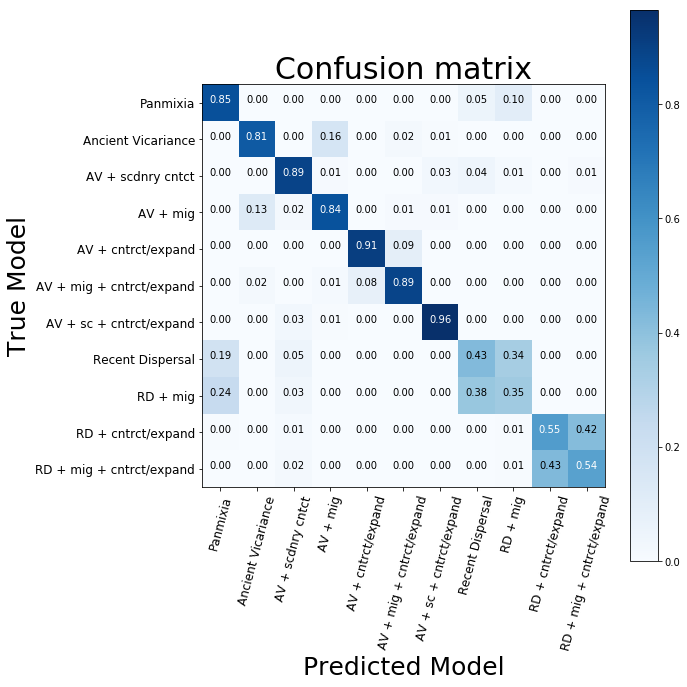

In [19]:
## dataset 2 confusion matrix
d2array = np.array(D2confusionMat[D2confusionMat.columns[:-1]])
plot_confusion_matrix(d2array, modelNames[:-1], writeOut=False, normalize=True, outpng="RfConfMat")

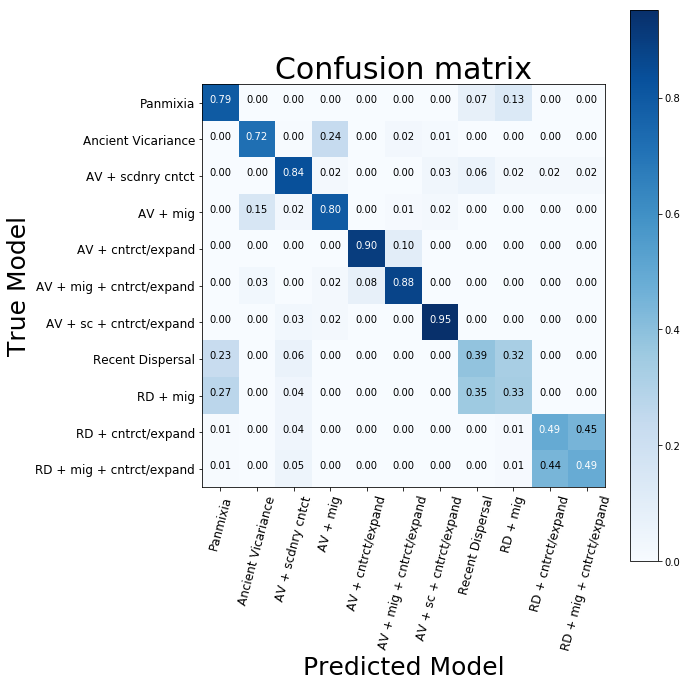

In [20]:
## dataset 4 confusion matrix
d4array = np.array(D4confusionMat[D4confusionMat.columns[:-1]])
plot_confusion_matrix(d4array, modelNames[:-1], writeOut=False, normalize=True, outpng="RfConfMat")

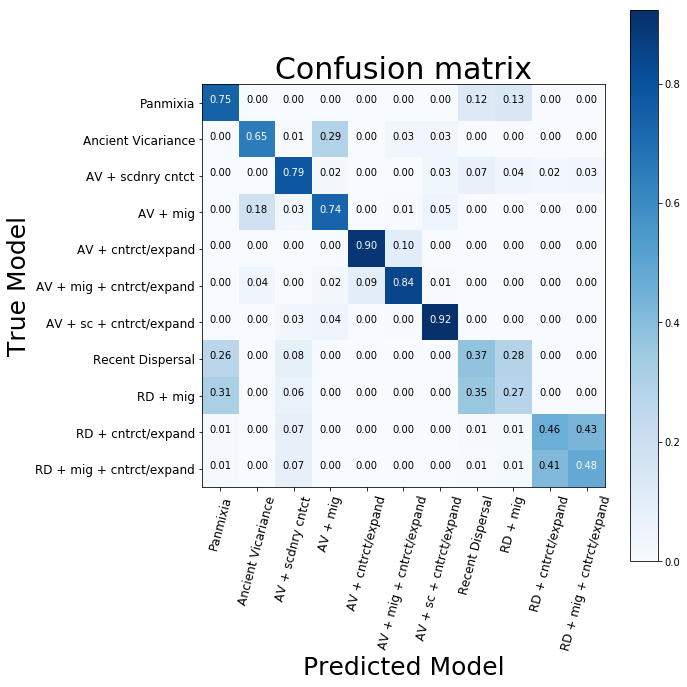

In [21]:
## dataset 6 confusion matrix
d6array = np.array(D6confusionMat[D6confusionMat.columns[:-1]])
plot_confusion_matrix(d6array, modelNames[:-1], writeOut=False, normalize=True, outpng="RfConfMat")

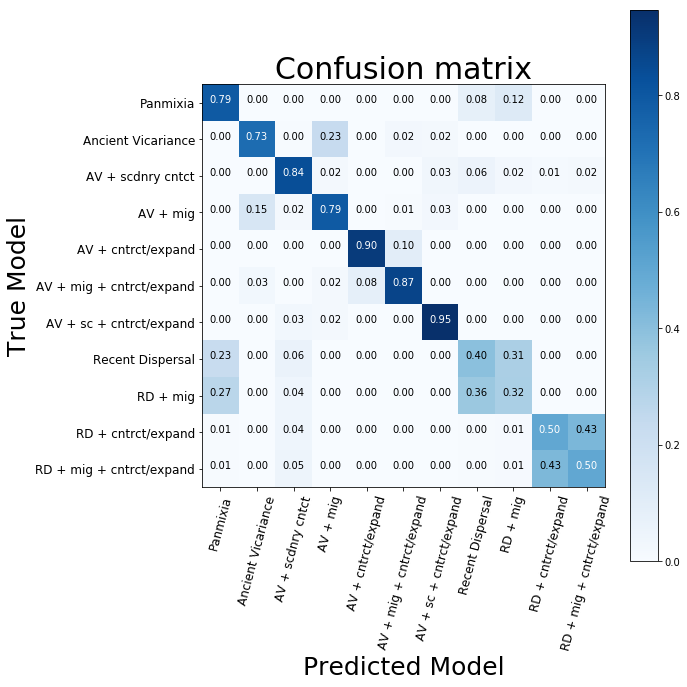

In [22]:
## Combine the 3 confusion matrixes into 1 and plot that confusion matrix

list = (d2array, d4array, d6array) 
newArray = np.mean(list, axis=0)
plot_confusion_matrix(newArray, modelNames[:-1], writeOut=True, normalize=True, outpng="Average11ModConfusionMatrix")

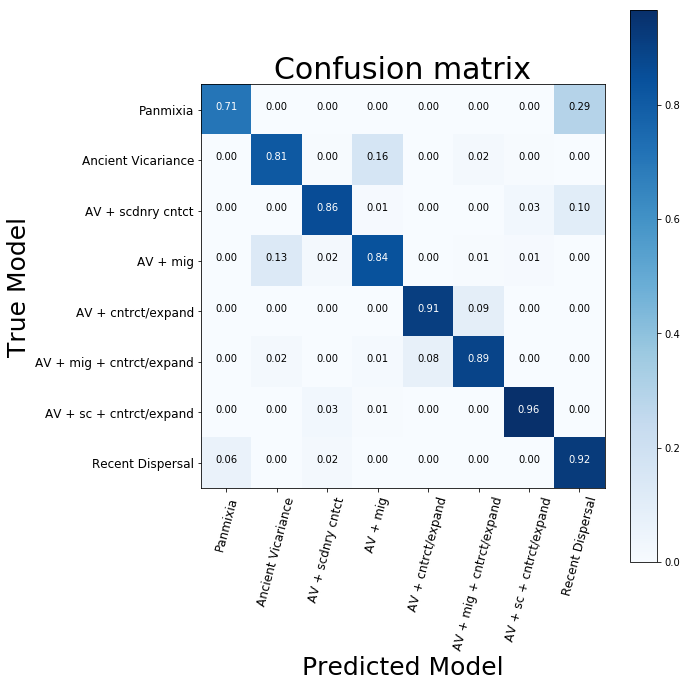

In [23]:
## Load data for 3 confusion matrices; these are the grouped 8-model matrices with raw numbers of correctly classified
##   simulations. Here, the recent dispersal models have been collapsed into one

Groupmods = modelNames[0:8]
Groupmods.append(modelNames[11])

## Read in for dataset 2; which has 8 inland 13 coastal and 20455 SNPs
D2confusionMatGrp = pd.read_csv('./dataset2/Dataset2_RFconfusionMatrix_GROUP.csv', delimiter = '\t')
D2confusionMatGrp.columns = Groupmods
D2confusionMatGrp

## dataset 2 group confusion matrix
d2arrayGrp = np.array(D2confusionMatGrp[D2confusionMatGrp.columns[:-1]])
plot_confusion_matrix(d2arrayGrp, Groupmods[:-1], writeOut=False, normalize=True, outpng="RfConfMat")

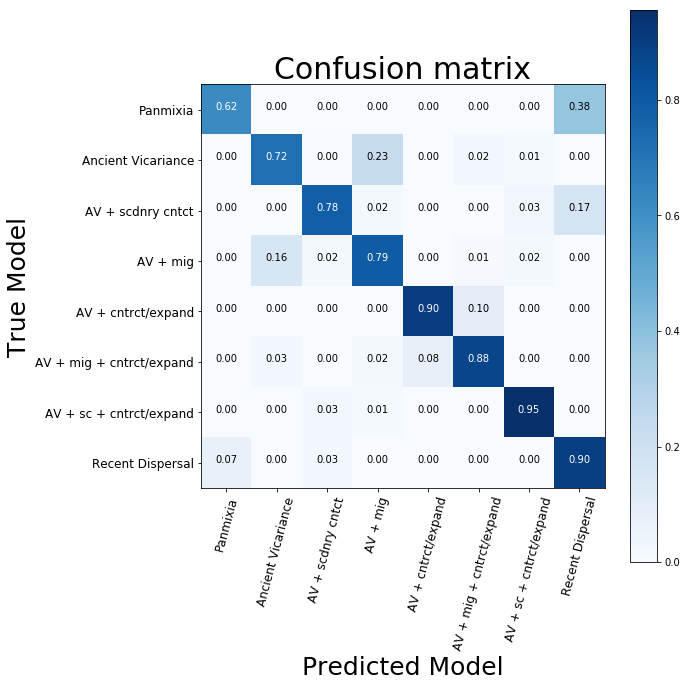

In [24]:
## Read in for dataset 4; which has 
D4confusionMatGrp = pd.read_csv('./dataset4/Dataset4_RFconfusionMatrix_GROUP.csv', delimiter = '\t')
D4confusionMatGrp.columns = Groupmods
D4confusionMatGrp

## dataset 2 group confusion matrix
d4arrayGrp = np.array(D4confusionMatGrp[D4confusionMatGrp.columns[:-1]])
plot_confusion_matrix(d4arrayGrp, Groupmods[:-1], writeOut=False, normalize=True, outpng="RfConfMat")

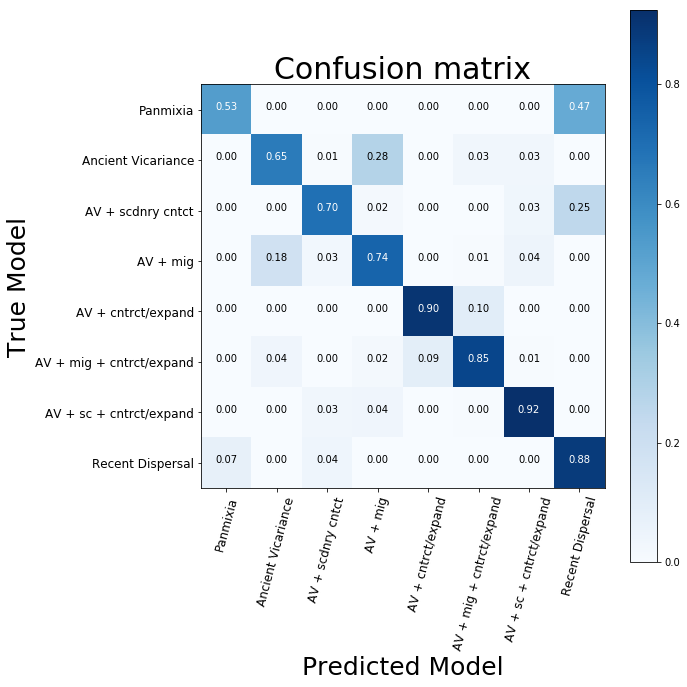

In [25]:
## Read in for dataset 6; which has 
D6confusionMatGrp = pd.read_csv('./dataset6/Dataset6_RFconfusionMatrix_GROUP.csv', delimiter = '\t')
D6confusionMatGrp.columns = Groupmods
D6confusionMatGrp

## dataset 6 group confusion matrix
d6arrayGrp = np.array(D6confusionMatGrp[D6confusionMatGrp.columns[:-1]])
plot_confusion_matrix(d6arrayGrp, Groupmods[:-1], writeOut=False, normalize=True, outpng="RfConfMat")

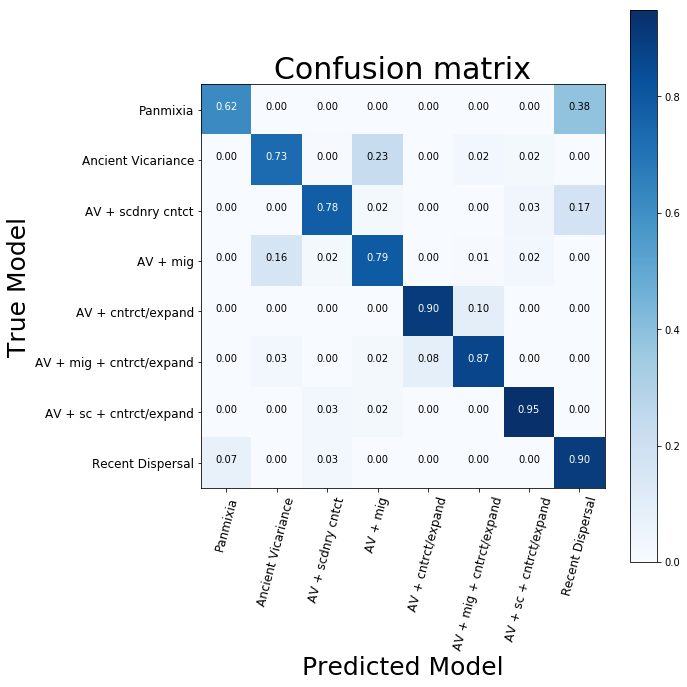

In [26]:
## Combine the 3 confusion matrixes into 1 and plot that confusion matrix

list = (d2arrayGrp, d4arrayGrp, d6arrayGrp) 
newArray = np.mean(list, axis=0)
plot_confusion_matrix(newArray, Groupmods[:-1], writeOut=True, normalize=True, outpng="Average8ModConfusionMatrix_Grp")

# Random Forest Predictions

In [4]:
## Bring in predictions from RF to plot model probs and proportion of votes. 
## Might be best to start with Posterior Prob of model selected

## prediction for dataset 2
predictionsD2 = pd.read_csv('./dataset2/PredictionOut_Dataset2.csv', delimiter = '\t',header=0)
predictionsD2

,selected model,votes model1,votes model2,votes model3,votes model4,votes model5,votes model6,votes model7,votes model8,votes model9,votes model10,votes model11,post.proba
1,7,0,29,69,179,0,0,722,0,0,1,0,0.921233
2,7,0,31,167,212,0,0,589,0,0,1,0,0.894867
3,7,0,38,150,203,0,0,608,0,0,0,1,0.931867
4,7,0,40,170,152,0,0,635,0,0,1,2,0.890667
5,7,0,27,261,181,0,0,531,0,0,0,0,0.886300
6,7,0,24,350,195,0,0,431,0,0,0,0,0.886233
7,7,0,30,284,189,0,0,495,0,0,1,1,0.884967
8,7,0,28,244,215,0,2,509,0,0,0,2,0.903300
9,7,0,39,178,183,0,0,598,0,0,0,2,0.890467
10,7,0,31,224,194,0,2,546,0,0,1,2,0.903367


In [6]:
## prediction for dataset 2
predictionsD4 = pd.read_csv('./dataset4/PredictionOut_Dataset4.csv', delimiter = '\t')
predictionsD4

,selected model,votes model1,votes model2,votes model3,votes model4,votes model5,votes model6,votes model7,votes model8,votes model9,votes model10,votes model11,post.proba
1,7,0,2,321,88,0,0,431,0,0,115,43,0.838733
2,7,0,0,242,72,0,0,444,0,0,203,39,0.776967
3,7,0,2,328,46,0,0,477,0,0,115,32,0.844567
4,3,0,2,346,87,0,1,301,0,0,199,64,0.815767
5,7,0,1,289,87,0,0,388,0,0,177,58,0.796767
6,3,0,4,417,135,0,0,316,0,0,91,37,0.881433
7,7,0,3,289,91,0,0,454,0,0,116,47,0.844133
8,7,0,2,285,61,0,0,496,0,0,119,37,0.863967
9,3,0,1,383,64,0,1,208,0,0,259,84,0.814600
10,3,0,3,386,131,0,0,282,0,0,136,62,0.810867


In [29]:
## prediction for dataset 6
predictionsD6 = pd.read_csv('./dataset6/PredictionOut_Dataset6.csv', delimiter = '\t')
predictionsD6

,selected model,votes model1,votes model2,votes model3,votes model4,votes model5,votes model6,votes model7,votes model8,votes model9,votes model10,votes model11,post.proba
1,3,0,0,789,2,0,0,3,0,0,76,130,0.794267
2,3,0,0,819,1,0,0,2,0,0,66,112,0.797367
3,3,0,0,736,1,0,0,0,0,0,116,147,0.733167
4,3,0,0,504,1,0,0,6,0,0,251,238,0.683633
5,3,0,0,776,4,0,0,8,0,0,105,107,0.821567
6,3,0,1,496,9,0,0,18,0,0,306,170,0.704967
7,3,0,0,501,1,0,0,2,0,0,244,252,0.678500
8,3,0,0,854,4,0,0,10,0,0,55,77,0.865467
9,3,0,0,747,4,0,0,7,0,0,146,96,0.744900
10,3,0,0,762,1,0,0,1,0,0,111,125,0.736433


In [7]:
def getSelectedModel(infile):
    """this function takes the prediction output from delimitR in the form of a csv file"""
    
    predictions = pd.read_csv(infile, delimiter = '\t')

    ModNames = []
    ModSelected = []
    ModVotes = []
    ModProbs = []
    for i in np.unique(predictions.iloc[:,0]):
        ModNames.append(i)
        ModSelected.append(sum(predictions.iloc[:,0]==i))
        ModVotes.append(np.mean(predictions.loc[predictions.iloc[:,0]==i].iloc[:,i]))
        ModProbs.append(np.mean(predictions.loc[predictions.iloc[:,0]==i].iloc[:,12]))

    return ModNames, ModSelected, ModVotes, ModProbs


In [8]:
infile = './dataset2/PredictionOut_Dataset2.csv'
predictions = pd.read_csv(infile, delimiter = '\t')
i = np.unique(predictions.iloc[:,0])[1]
predictions.iloc[:,0]==i
predictions.loc[predictions.iloc[:,0]==i]
predictions.loc[predictions.iloc[:,0]==i].iloc[:,i]

1      722
2      589
3      608
4      635
5      531
6      431
7      495
8      509
9      598
10     546
11     601
13     784
14     519
15     618
16     534
17     668
19     636
20     585
21     542
22     707
23     434
24     580
25     549
26     531
27     422
28     442
29     704
30     572
31     612
32     540
33     332
34     541
35     686
36     661
37     617
38     695
39     410
40     496
41     622
43     500
44     384
45     583
46     559
47     501
48     610
49     503
50     432
51     567
52     507
53     492
54     515
55     685
56     692
57     659
58     631
59     733
60     560
61     755
62     591
64     706
65     480
66     733
67     509
68     483
69     675
70     370
71     680
72     626
73     623
74     680
75     678
76     711
77     607
78     695
79     540
80     399
82     596
83     606
84     566
85     604
86     511
87     647
88     451
89     579
90     538
91     653
92     660
93     742
94     606
95     522
97     650

In [9]:
infile = './dataset2/PredictionOut_Dataset2.csv'
d2pred = getSelectedModel(infile)
d2pred

([4, 7],
 [7, 93],
 [384.57142857142856, 581.6236559139785],
 [0.893952380952381, 0.9011462365591398])

In [10]:
infile = './dataset4/PredictionOut_Dataset4.csv'
d4pred = getSelectedModel(infile)
d4pred

([3, 7],
 [39, 61],
 [396.15384615384613, 443.0163934426229],
 [0.8265564102564101, 0.8451612021857925])

In [11]:
infile = './dataset6/PredictionOut_Dataset6.csv'
d6pred = getSelectedModel(infile)
d6pred

([3, 10, 11],
 [92, 7, 1],
 [669.6521739130435, 479.85714285714283, 385.0],
 [0.7453768115942031, 0.5592142857142858, 0.5208])

In [12]:
modPreds = [d2pred, d4pred, d6pred]
modPreds[2]
range(0, len(modPreds))
len(np.unique(modPreds[0][0]))

uniqueMods = []
for i in range(0, len(modPreds)):
    uniqueMods.append(len(np.unique(modPreds[0][i])))
np.max(uniqueMods)

2

In [13]:
def plotModelPrediction(modPreds):
    
    uniqueMods = []
    for i in range(0, len(modPreds)):
        uniqueMods.append(len(np.unique(modPreds[0][i])))
    numUnqMods = np.max(uniqueMods)

    
mod3votes[2]+mod10votes[2]

NameError: name 'mod3votes' is not defined

In [174]:
import pandas as pd
import matplotlib.cm as cm
import numpy as np
import matplotlib.pyplot as plt

def plot_clustered_stacked(dfall, labels=None, title="Model Predictions",  H="/", **kwargs):
    """Given a list of dataframes, with identical columns and index, create a clustered stacked bar plot. 
labels is a list of the names of the dataframe, used for the legend
title is a string for the title of the plot
H is the hatch used for identification of the different dataframe"""

    n_df = len(dfall)
    n_col = len(dfall[0].columns) 
    n_ind = len(dfall[0].index)
    axe = plt.subplot(111)

    for df in dfall : # for each data frame
        axe = df.plot(kind="bar",
                      linewidth=0,
                      stacked=True,
                      ax=axe,
                      legend=False,
                      grid=False, color=['lightcoral','indigo', 'steelblue', 'sandybrown', 'maroon'],
                      **kwargs)  # make bar plots
         

    h,l = axe.get_legend_handles_labels() # get the handles we want to modify
    for i in range(0, n_df * n_col, n_col): # len(h) = n_col * n_df
        for j, pa in enumerate(h[i:i+n_col]):
            for rect in pa.patches: # for each index
                rect.set_x(rect.get_x() + 1 / float(n_df + 1) * i / float(n_col))
                rect.set_hatch(H * int(i / n_col)) #edited part     
                rect.set_width(1 / float(n_df + 1))

    axe.set_xticks((np.arange(0, 2 * n_ind, 2) + 1 / float(n_df + 1)) / 2.)
    axe.set_xticklabels(df.index, rotation = 0)
    axe.set_title(title)

    # Add invisible data to add another legend
    n=[]        
    for i in range(n_df):
        n.append(axe.bar(0, 0, color="aliceblue", hatch=H * i))
    
    l1 = axe.legend(h[:n_col], l[:n_col], loc=[1.01, 0.5])
    #if labels is not None:
        #l2 = plt.legend(n, labels, loc=[1.01, 0.1], fontsize=25) 
    axe.add_artist(l1)
    
    plt.savefig("ModelPred_ThuJTsug.png", bbox_inches='tight',  dpi=300)
    
    return axe



# Then, just call :
#plot_clustered_stacked([df1, df2, df3],["df1", "df2", "df3"])

In [82]:
df1

,AV+sc,AV+mig,AV+sc+bot/exp,RD+bot/exp,RD+mig+bot/exp
d1,0,7,93,0,0
d2,39,0,61,0,0
d3,92,0,0,7,1


In [147]:
## this is for tsuga
df1 = pd.DataFrame([[0, 7, 93, 0, 0], [39, 0, 61, 0, 0], [92, 0, 0, 7, 1]], 
                   index = ["~10,000", "~3,000", "~1,000"], 
                   columns = ["AV+sc", "AV+mig", "AV+sc+bot/exp", "RD+bot/exp", "RD+mig+bot/exp"])
df1

,AV+sc,AV+mig,AV+sc+bot/exp,RD+bot/exp,RD+mig+bot/exp
"~10,000",0,7,93,0,0
"~3,000",39,0,61,0,0
"~1,000",92,0,0,7,1


In [148]:
## this is for Thuja
df2 = pd.DataFrame([[0, 0, 100, 0, 0], [0, 0, 100, 0, 0], [0, 0, 100, 0, 0]], 
                   index = ["~10,000", "~3,000", "~1,000"], 
                   columns = ["AV+sc", "AV+mig", "AV+sc+bot/exp", "RD+bot/exp", "RD+mig+bot/exp"])
df2

,AV+sc,AV+mig,AV+sc+bot/exp,RD+bot/exp,RD+mig+bot/exp
"~10,000",0,0,100,0,0
"~3,000",0,0,100,0,0
"~1,000",0,0,100,0,0


In [100]:
df2

,AV+sc,AV+mig,AV+sc+bot/exp,RD+bot/exp,RD+mig+bot/exp
"~10,000",0,0,100,0,0
"~3,000",0,0,100,0,0
"~1,000",0,0,100,0,0


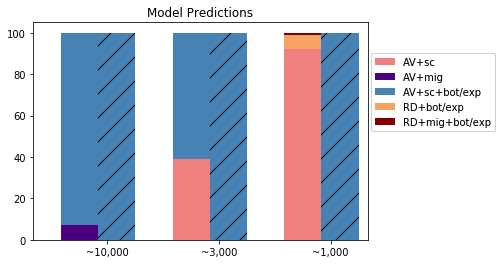

In [175]:
# Then, just call :
plot_clustered_stacked([df1, df2],["Tsuga heterophylla", "Thuja plicata" ])

NameError: name 'modelNames' is not defined

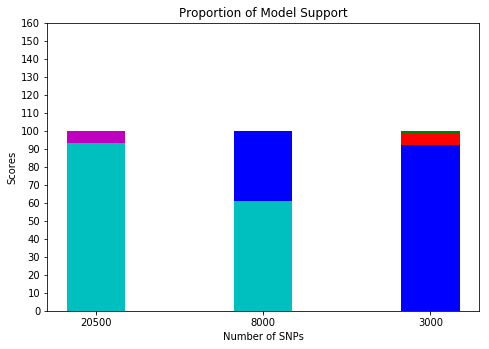

In [18]:
N = 3
mod3votes = (0, 39, 92)
mod4votes = (7, 0, 0)
mod7votes = (93,61,0)
mod10votes = (0, 0, 7)
mod11votes = (0, 0, 1)

ind = np.arange(int(N)) # the x locations for the groups
width = 0.35
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(('20500', '8000', '3000'), mod7votes, width, color='c')
ax.bar(('20500', '8000', '3000'), mod4votes, width,bottom=mod7votes, color='m')
ax.bar(('20500', '8000', '3000'), mod3votes, width,bottom=mod7votes, color='b')
ax.bar(('20500', '8000', '3000'), mod10votes, width,bottom=mod3votes, color='r')
ax.bar(('20500', '8000', '3000'), mod11votes, width,bottom=mod3votes[2]+mod10votes[2], color='g')
ax.set_ylabel('Scores')
ax.set_xlabel('Number of SNPs')
ax.set_title('Proportion of Model Support')
ax.set_xticks(ind, ('20500', '8000', '3000'))
ax.set_yticks(np.arange(0, 170, 10))
ax.legend(labels=[modelNames[6], modelNames[3], modelNames[2], modelNames[9], modelNames[10]])
plt.show()

# Observed jSFS

In [192]:
def plot_ObsReplicateSFS(observedSFSfile, outfile, writeOut=True, normalize=True, sim = False, pop1size=10, pop2size=10, reps=100, vmax=50):
        
        '''This file takes and observed SFS files, where each line is a different flattened SFS,
        and then averages the values for each SFS cell and then writes out an average joint SFS'''
        
        ## import matrix
        sfsMatrix = pd.read_csv(observedSFSfile, delimiter = '\t', header=None)
 
        ## get means of each column
        means = sfsMatrix.mean(axis=0)[:-1]
        
        if (sim == True):
            means = sfsMatrix.mean(axis=0)
            
        if (normalize == True):
            Total = np.sum(means) 
            means = means/Total
        
        ## split up array into groups to write out dataframe
        group = np.split(means, pop1size+1)
        
        matrix = np.zeros((pop1size+1, pop2size+1,))
        
        for i in range(0, len(group), 1):
            #print(group[i])
            matrix[:][i] = group[i]
            #matrix[:,i] = group[i]
            #print(group[i])
        SummarizedSFS = pd.DataFrame(matrix)
        #SummarizedSFS = SummarizedSFS.iloc[::-1]
        
        SFStansposed = SummarizedSFS.transpose()
        SFStansposed = SFStansposed.reindex(index=SFStansposed.index[::-1])
        #print(SFStansposed)
        
        sns_plot = sns.heatmap(SFStansposed, cmap='coolwarm', robust=True,  vmax=vmax, vmin=0)
        
        if (writeOut==True):
            fig = sns_plot.get_figure()
            fig.savefig(outfile, dpi=300)
        
        return sns_plot
        #return SummarizedSFS

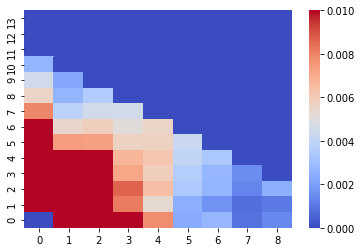

In [193]:
infile="./dataset2/jSFS_dataset2_noMono4plot.obs"
#sfsMatrix = pd.read_csv(infile, delimiter = '\t')
SummarizedSFS = plot_ObsReplicateSFS(infile, "dataset2_jSFSobs.png", normalize=True, writeOut=True, sim=False, pop1size=8, pop2size=13, reps=100, vmax=0.01)


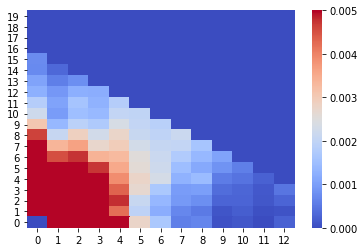

In [194]:
infile="./dataset4/jSFS_dataset4_noMono4plot.obs"
SummarizedSFS = plot_ObsReplicateSFS(infile, "dataset4_jSFSobs.png", normalize=True, writeOut=True, sim=False, pop1size=12, pop2size=19, reps=100, vmax=0.005)

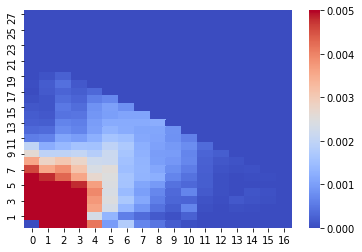

In [195]:
infile="./dataset6/jSFS_dataset6_noMono4plot.obs"
SummarizedSFS = plot_ObsReplicateSFS(infile, "dataset6_jSFSobs.png", normalize=True, writeOut=True, sim=False, pop1size=16, pop2size=27, reps=100, vmax=0.005)

# Simulated jSFS

In [131]:
def format_simulatedSFS(simSFSfile):
        
        '''This file takes and observed SFS files, where each line is a different flattened SFS,
        and then averages the values for each SFS cell and then writes out an average joint SFS'''
        
        ## put all lines here, which is what will guide what you replace
        allLines = open(simSFSfile, 'r').readlines()
        
        tempOutfile = open("tempSFSfile.obs", 'w+')
    
        ## go through each line in file to fine the ones with sample size and snps
        for linenum in range(0, len(allLines), 1):
            if allLines[linenum].split("\t")[0] == "0":
                tempOutfile.write(allLines[linenum])

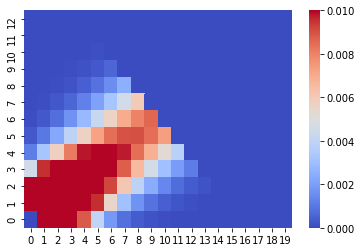

In [133]:
## Model 1: Panmixia

infile="./dataset4/Tsuga_1_MSFS.obs"
format_simulatedSFS(infile)
plot_ObsReplicateSFS("tempSFSfile.obs", "SimulatedSFSmodel1.png", normalize=True, writeOut=False, sim=True, pop1size=12, pop2size=19, reps=100, vmax=.01)

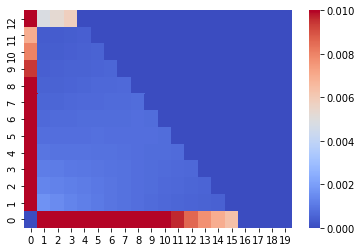

In [134]:
## Model 2: AV

infile="./dataset4/Tsuga_2_MSFS.obs"
format_simulatedSFS(infile)
plot_ObsReplicateSFS("tempSFSfile.obs", "SimulatedSFSmodel2.png", 
                     normalize=True, writeOut=False, sim=True, pop1size=12, pop2size=19, reps=100, vmax=.01)

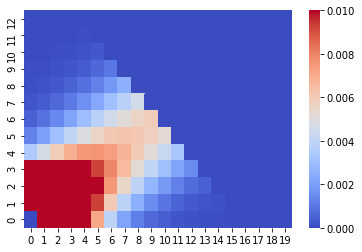

In [135]:
## Model 3: AV + secondary contact

infile="./dataset4/Tsuga_3_MSFS.obs"
format_simulatedSFS(infile)
plot_ObsReplicateSFS("tempSFSfile.obs", "SimulatedSFSmodel3.png", 
                     normalize=True, writeOut=False, sim=True, pop1size=12, pop2size=19, reps=100, vmax=.01)

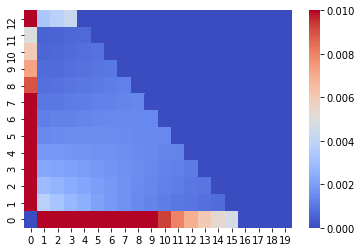

In [136]:
## Model 4: AV + migration

infile="./dataset4/Tsuga_4_MSFS.obs"
format_simulatedSFS(infile)
plot_ObsReplicateSFS("tempSFSfile.obs", "SimulatedSFSmodel4.png", 
                     normalize=True, writeOut=False, sim=True, pop1size=12, pop2size=19, reps=100, vmax=.01)

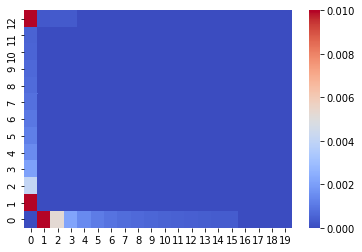

In [140]:
## Model 5: AV + pop contract/expansion

infile="./dataset4/Tsuga_5_MSFS.obs"
format_simulatedSFS(infile)
plot_ObsReplicateSFS("tempSFSfile.obs", "SimulatedSFSmodel5.png", 
                     normalize=True, writeOut=False, sim=True, pop1size=12, pop2size=19, reps=100, vmax=.01)

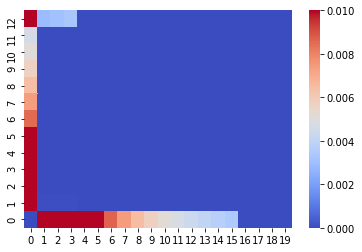

In [141]:
## Model 6: AV + mig + pop contract/expansion

infile="./dataset4/Tsuga_6_MSFS.obs"
format_simulatedSFS(infile)
plot_ObsReplicateSFS("tempSFSfile.obs", "SimulatedSFSmodel6.png", 
                     normalize=True, writeOut=False, sim=True, pop1size=12, pop2size=19, reps=100, vmax=.01)

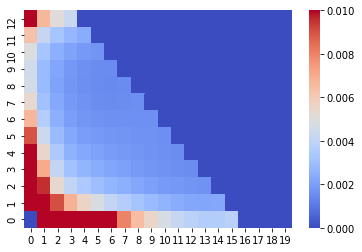

In [142]:
## Model 7: AV + sc + pop contract/expansion

infile="./dataset4/Tsuga_7_MSFS.obs"
format_simulatedSFS(infile)
plot_ObsReplicateSFS("tempSFSfile.obs", "SimulatedSFSmodel7.png", 
                     normalize=True, writeOut=False, sim=True, pop1size=12, pop2size=19, reps=100, vmax=.01)

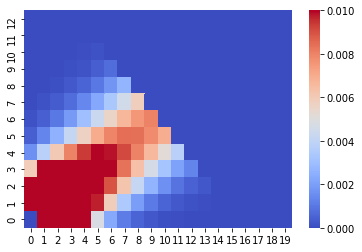

In [143]:
## Model 8: Recent Dispersal

infile="./dataset4/Tsuga_8_MSFS.obs"
format_simulatedSFS(infile)
plot_ObsReplicateSFS("tempSFSfile.obs", "SimulatedSFSmodel8.png", 
                     normalize=True, writeOut=False, sim=True, pop1size=12, pop2size=19, reps=100, vmax=.01)

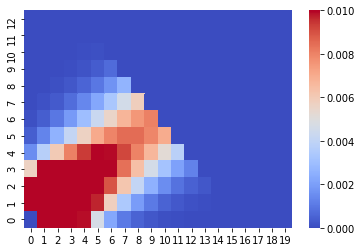

In [144]:
## Model 8: Recent Dispersal + mig

infile="./dataset4/Tsuga_9_MSFS.obs"
format_simulatedSFS(infile)
plot_ObsReplicateSFS("tempSFSfile.obs", "SimulatedSFSmodel9.png", 
                     normalize=True, writeOut=False, sim=True, pop1size=12, pop2size=19, reps=100, vmax=.01)

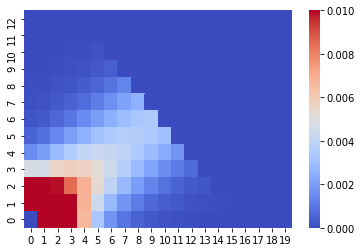

In [145]:
## Model 10: Recent Dispersal + pop contract/expansion

infile="./dataset4/Tsuga_10_MSFS.obs"
format_simulatedSFS(infile)
plot_ObsReplicateSFS("tempSFSfile.obs", "SimulatedSFSmodel10.png", 
                     normalize=True, writeOut=False, sim=True, pop1size=12, pop2size=19, reps=100, vmax=.01)

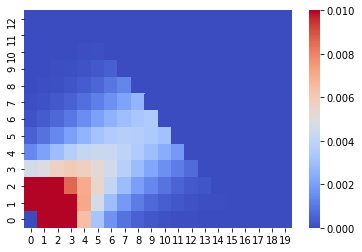

In [146]:
## Model 11: Recent Dispersal + mig + pop contract/expansion

infile="./dataset4/Tsuga_11_MSFS.obs"
format_simulatedSFS(infile)
plot_ObsReplicateSFS("tempSFSfile.obs", "SimulatedSFSmodel11.png", 
                     normalize=True, writeOut=False, sim=True, pop1size=12, pop2size=19, reps=100, vmax=.01)